# Titanic - ML model
---

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sciopt
import sklearn.ensemble
from sklearn import metrics
from sklearn import svm


## DAC (Data Acquisition)

In [36]:
trainData = pd.read_csv("assets/train.csv")
testData  = pd.read_csv("assets/test.csv")
trainData.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Model - Clean Data

In [37]:
features = ['Pclass', 'Sex', 'Age', "SibSp", 'Parch', 'Fare']
yTrain = trainData['Survived'][0::2]
yTest  = trainData['Survived'][1::2]
xTrain = trainData[features][0::2]
xTest  = trainData[features][1::2]

yTest.isnull()
def cleanData(dbx, dby):
    amNull = dbx.isnull().sum()
    amNull = list(amNull)
    idxAmNullMax = amNull.index(max(amNull))
    amNull_ = amNull[idxAmNullMax]

    Nan = True

    db_cleanX = pd.get_dummies(dbx).values
    db_cleanY = pd.get_dummies(dby).values

    while Nan:
        if amNull_ == 0:
            Nan = False
        else:
            idxListNan = np.argwhere(np.isnan(db_cleanX))

            db_cleanX = np.delete(db_cleanX, idxListNan[0,0], axis=0)
            db_cleanY = np.delete(db_cleanY, idxListNan[0,0], axis=0)
            amNull_ -= 1
    
    return db_cleanX, db_cleanY

xTrainC, yTrainC = cleanData(xTrain, yTrain)
xTestC,  yTestC  = cleanData(xTest, yTest)


## Model - Testing 

Acc: 0.8055555555555556
Rec: 0.6967741935483871
Pre: 0.8244274809160306
Spe: 0.8244274809160306
F1 : 0.7552447552447553


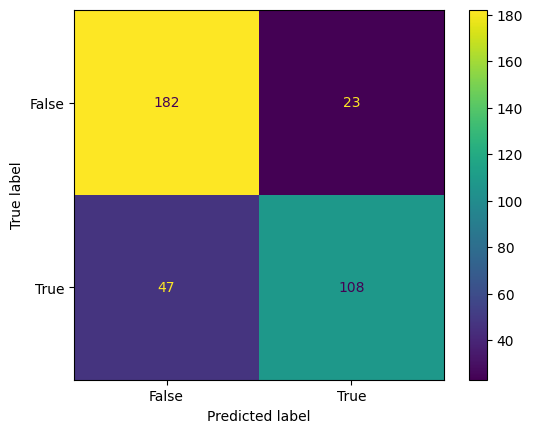

In [58]:
RFC = sklearn.ensemble.RandomForestClassifier

model = RFC(n_estimators=50, max_depth=20, random_state=1)
model.fit(xTrainC, yTrainC[:,1])
y_pred = model.predict(xTestC)

accScore = metrics.accuracy_score(yTestC[:,1], y_pred); print(f"Acc: {accScore}")
recScore = metrics.recall_score(yTestC[:,1], y_pred); print(f"Rec: {recScore}")
preScore = metrics.precision_score(yTestC[:,1], y_pred); print(f"Pre: {preScore}")
speScore = metrics.precision_score(yTestC[:,1], y_pred); print(f"Spe: {speScore}")
F1_Score = metrics.f1_score(yTestC[:,1], y_pred); print(f"F1 : {F1_Score}")


confMat = metrics.confusion_matrix(yTestC[:,1], y_pred)
CM_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confMat, display_labels=[False, True])
CM_disp.plot()
plt.show()

Acc: 0.6222222222222222
Rec: 0.14193548387096774
Pre: 0.88
Spe: 0.88
F1 : 0.24444444444444446


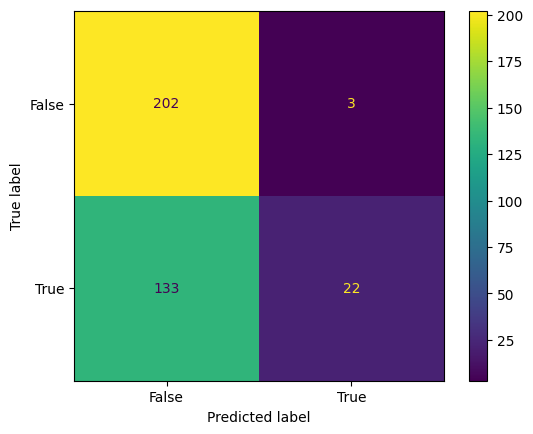

In [50]:
model_svm = svm.SVC(kernel='poly', degree=6)
model_svm.fit(xTrainC, yTrainC[:,1])
y_pred = model_svm.predict(xTestC)

accScore = metrics.accuracy_score(yTestC[:,1], y_pred); print(f"Acc: {accScore}")
recScore = metrics.recall_score(yTestC[:,1], y_pred); print(f"Rec: {recScore}")
preScore = metrics.precision_score(yTestC[:,1], y_pred); print(f"Pre: {preScore}")
speScore = metrics.precision_score(yTestC[:,1], y_pred); print(f"Spe: {speScore}")
F1_Score = metrics.f1_score(yTestC[:,1], y_pred); print(f"F1 : {F1_Score}")


confMat = metrics.confusion_matrix(yTestC[:,1], y_pred)
CM_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confMat, display_labels=[False, True])
CM_disp.plot()
plt.show()

Acc: 0.6638888888888889
Rec: 0.4129032258064516
Pre: 0.6808510638297872
Spe: 0.6808510638297872
F1 : 0.5140562248995983


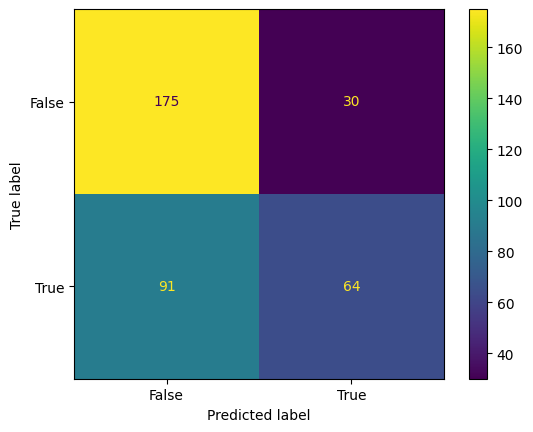

In [51]:
model_KNC = sklearn.neighbors.NearestCentroid()
model_KNC.fit(xTrainC, yTrainC[:, 1])
y_pred = model_KNC.predict(xTestC)

accScore = metrics.accuracy_score(yTestC[:,1], y_pred); print(f"Acc: {accScore}")
recScore = metrics.recall_score(yTestC[:,1], y_pred); print(f"Rec: {recScore}")
preScore = metrics.precision_score(yTestC[:,1], y_pred); print(f"Pre: {preScore}")
speScore = metrics.precision_score(yTestC[:,1], y_pred); print(f"Spe: {speScore}")
F1_Score = metrics.f1_score(yTestC[:,1], y_pred); print(f"F1 : {F1_Score}")


confMat = metrics.confusion_matrix(yTestC[:,1], y_pred)
CM_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confMat, display_labels=[False, True])
CM_disp.plot()
plt.show()

Acc: 0.7166666666666667
Rec: 0.5483870967741935
Pre: 0.7264957264957265
Spe: 0.7264957264957265
F1 : 0.6249999999999999


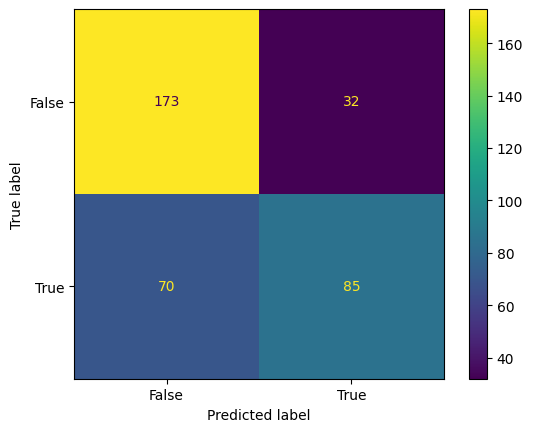

In [52]:
model_knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=15)
model_knn.fit(xTrainC, yTrainC[:,1])
y_pred = model_knn.predict(xTestC)

accScore = metrics.accuracy_score(yTestC[:,1], y_pred); print(f"Acc: {accScore}")
recScore = metrics.recall_score(yTestC[:,1], y_pred); print(f"Rec: {recScore}")
preScore = metrics.precision_score(yTestC[:,1], y_pred); print(f"Pre: {preScore}")
speScore = metrics.precision_score(yTestC[:,1], y_pred); print(f"Spe: {speScore}")
F1_Score = metrics.f1_score(yTestC[:,1], y_pred); print(f"F1 : {F1_Score}")


confMat = metrics.confusion_matrix(yTestC[:,1], y_pred)
CM_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confMat, display_labels=[False, True])
CM_disp.plot()
plt.show()

Acc: 0.8111111111111111
Rec: 0.6967741935483871
Pre: 0.8372093023255814
Spe: 0.8372093023255814
F1 : 0.7605633802816901


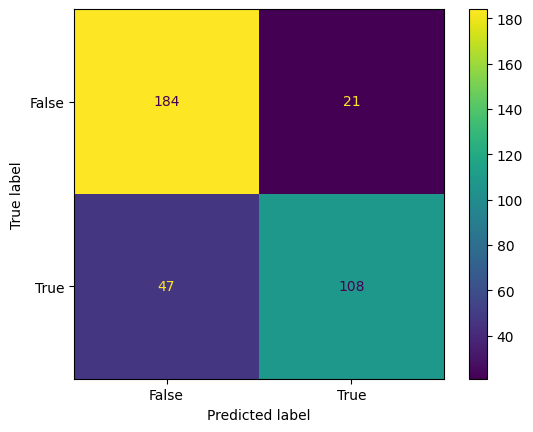

In [103]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(
    solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 6), random_state=1, max_iter=600
)
model_mlp.fit(xTrainC, yTrainC[:,1])
y_pred = model_mlp.predict(xTestC)

accScore = metrics.accuracy_score(yTestC[:,1], y_pred); print(f"Acc: {accScore}")
recScore = metrics.recall_score(yTestC[:,1], y_pred); print(f"Rec: {recScore}")
preScore = metrics.precision_score(yTestC[:,1], y_pred); print(f"Pre: {preScore}")
speScore = metrics.precision_score(yTestC[:,1], y_pred); print(f"Spe: {speScore}")
F1_Score = metrics.f1_score(yTestC[:,1], y_pred); print(f"F1 : {F1_Score}")


confMat = metrics.confusion_matrix(yTestC[:,1], y_pred)
CM_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confMat, display_labels=[False, True])
CM_disp.plot()
plt.show()